
📋 First 10 rows of data:
   Serial Number  Age  Gender   Review Education Purchased
0              1   56    Male     Poor        PG       Yes
1              2   46  Female     Good    School       Yes
2              3   32  Female     Good        PG        No
3              4   25  Female  Average        PG       Yes
4              5   38    Male     Poor        UG        No
5              6   56  Female  Average        UG       Yes
6              7   36    Male  Average        UG        No
7              8   40    Male     Poor        UG        No
8              9   28  Female     Good        UG        No
9             10   28  Female     Good    School        No

🔍 Missing values in each column:
Serial Number    0
Age              0
Gender           0
Review           0
Education        0
Purchased        0
dtype: int64

🧮 Predicted values:
[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]

✅ Model Evaluation:
Accuracy Score: 0.65

Confusion Matrix:
 [[11  1]
 [ 6  2]]

Classification Repo

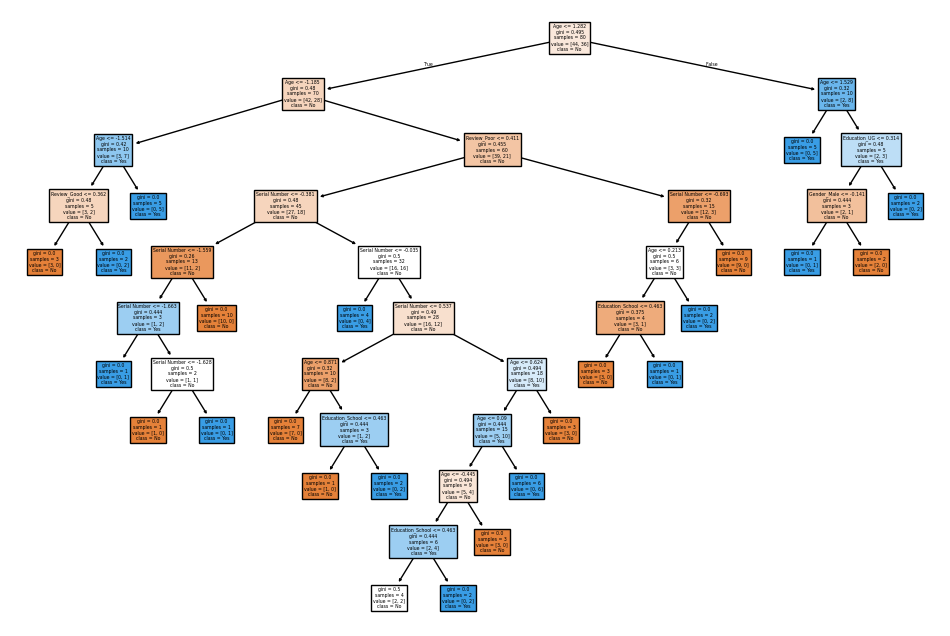

In [14]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
data = pd.read_csv('Customer_Review (1).csv')

# Display first 10 rows
print("\n📋 First 10 rows of data:")
print(data.head(10))

# Check for missing values
print("\n🔍 Missing values in each column:")
print(data.isnull().sum())

# One-hot encode categorical columns
encoded = pd.get_dummies(data[['Gender', 'Review', 'Education']], drop_first=True)
data = pd.concat([data, encoded], axis=1).drop(['Gender', 'Review', 'Education'], axis=1)

# Define features (X) and target (y)
# Use all numerical + encoded columns except target
X = data.drop('Purchased', axis=1)
y = data['Purchased']

# Convert target if it's Yes/No → numeric
if y.dtype == 'object':
    y = y.map({'Yes': 1, 'No': 0})

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(C=0.5, solver='liblinear', max_iter=300)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Display predictions
print("\n🧮 Predicted values:")
print(y_pred)

# Evaluate model
print("\n✅ Model Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



print('model 2 decision tree classifier for better result')
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion='gini',  max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("\n🌳 Decision Tree Evaluation:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No','Yes'])
plt.show()
